# Question 1

### Begin by downloading the python file that generates the data:
finalGenData.py

In [0]:
import os
import pandas as pd

!gdown https://drive.google.com/uc?id=1agcCm7oznqRJq31MA5d5Um0dU0kjFoG4

Downloading...
From: https://drive.google.com/uc?id=1agcCm7oznqRJq31MA5d5Um0dU0kjFoG4
To: /content/finalGenData.py
100% 209/209 [00:00<00:00, 317kB/s]


### Below is the program we will run
(final.SVM.sinc.py)

In [0]:
import finalGenData
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import KFold

# number of samples
N = 1000

# generate data & split it into X (training input) and y (target output)
X, y = finalGenData.genDataSet(N)

# linear regression solution
w=np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)


#penC  <- Penalty parameter C of the error term
#tubEpsilon  <- the epsilon-tube within which no penalty is associated

bestC=0
bestEpsilon=0
bestGamma=0
bestScore=float('-inf')
score=0
for penC in np.logspace(-5, 15, num=11, base=2):
  for tubEpsilon in np.linspace(0, 1, num=11):
    for paramGamma in np.logspace(-15, 3, num=10, base=2):
      kf = KFold(n_splits=10)
      cvscore=[]
      for train, validation in kf.split(X):
        X_train, X_validation, y_train, y_validation = X[train, :], X[validation, :], y[train], y[validation]
        # here we create the SVR
        svr =  SVR(C=penC, epsilon=tubEpsilon, gamma=paramGamma, kernel='rbf', verbose=False)
        # here we train the SVR
        svr.fit(X_train, y_train)
        # now we get E_out for validation set
        score=svr.score(X_validation, y_validation)
        cvscore.append(score)

      # average CV score
      score=sum(cvscore)/len(cvscore)
      if (score > bestScore):
        bestScore=score
        bestC=penC
        bestEpsilon=tubEpsilon
        bestGamma=paramGamma
        print("C " + str(penC) + ", epsilon " + str(tubEpsilon) + ", gamma " + str(paramGamma) + ". Testing set CV score: %f" % score)

# here we get a new training dataset
X, y = finalGenData.genDataSet(N)
# here we create the final SVR
svr =  SVR(C=bestC, epsilon=bestEpsilon, gamma=bestGamma, kernel='rbf', verbose=True)
# here we train the final SVR
svr.fit(X, y)
# E_out in training
print("Training set score: %f" % svr.score(X, y)) 
# here we get a new testing dataset
X, y = finalGenData.genDataSet(N)
# here test the final SVR and get E_out for testing set
ypred=svr.predict(X)
score=svr.score(X, y)
print("Testing set score: %f" % score)
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[:, 0], y, 'rx')
plt.plot(X[:, 0], ypred, '-k')
ypredLR=X.dot(w)
plt.plot(X[:, 0], ypredLR, '--g')
plt.show()

C 0.03125, epsilon 0.0, gamma 3.0517578125e-05. Testing set CV score: -0.241709
C 0.03125, epsilon 0.0, gamma 0.0001220703125. Testing set CV score: -0.225127
C 0.03125, epsilon 0.0, gamma 2.0. Testing set CV score: 0.267152
C 0.125, epsilon 0.0, gamma 2.0. Testing set CV score: 0.274826


# Question 2

### Begin by downloading the csv files:
features.csv\
features-t.csv

In [0]:
import pandas as pd

!gdown https://drive.google.com/uc?id=1OHHrzQy44fkBNZdDBlEHLIiPmoy7km8p

features = pd.read_csv('features.csv')

!gdown https://drive.google.com/uc?id=1KrCIp5gnQXwz206CLnFVlb8RjQZDTdOk
  
featuresT = pd.read_csv('features-t.csv')

Downloading...
From: https://drive.google.com/uc?id=1OHHrzQy44fkBNZdDBlEHLIiPmoy7km8p
To: /content/features.csv
100% 167k/167k [00:00<00:00, 65.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KrCIp5gnQXwz206CLnFVlb8RjQZDTdOk
To: /content/features-t.csv
100% 46.0k/46.0k [00:00<00:00, 40.1MB/s]


### Then we will download the python file that generates the data:
final.GetDigits.py

In [0]:
!gdown https://drive.google.com/uc?id=1PhI77VAKregTYFpVL5RE91yVEuTE8YWg

Downloading...
From: https://drive.google.com/uc?id=1PhI77VAKregTYFpVL5RE91yVEuTE8YWg
To: /content/finalGetDigits.py
100% 362/362 [00:00<00:00, 320kB/s]


### Below is the program we will run
(final.SVM.dig.py)

In [0]:
import finalGetDigits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import KFold

# get digits data X (training input) and y (target output)
X, y, X_te, y_te = finalGetDigits.getDataSet()

#penC  <- Penalty parameter C of the error term
#tubEpsilon  <- the epsilon-tube within which no penalty is associated

bestC=0
bestEpsilon=0
bestGamma=0
bestScore=float('-inf')
score=0
for penC in np.logspace(6, 12, num=7, base=2):
  for tubEpsilon in np.linspace(0.5, 2.5, num=21):
    for paramGamma in np.logspace(-6, -2, num=5, base=2):
      kf = KFold(n_splits=np.random.randint(2,11))
      cvscore=[]
      for train, validation in kf.split(X):
        X_train, X_validation, y_train, y_validation = X[train, :], X[validation, :], y[train], y[validation]
        # here we create the SVR
        svr =  SVR(C=penC, epsilon=tubEpsilon, gamma=paramGamma, kernel='rbf', verbose=False)
        # here we train the SVR
        svr.fit(X_train, y_train)
        # now we get E_out for validation set
        score=svr.score(X_validation, y_validation)
        cvscore.append(score)

      # average CV score
      score=sum(cvscore)/len(cvscore)
      if (score > bestScore):
        bestScore=score
        bestC=penC
        bestEpsilon=tubEpsilon
        bestGamma=paramGamma
        print("BEST! -> C " + str(penC) + ", epsilon " + str(tubEpsilon) + ", gamma " + str(paramGamma) + ". Testing set CV score: %f" % score)
      else:
        print("C " + str(penC) + ", epsilon " + str(tubEpsilon) + ", gamma " + str(paramGamma) + ". Testing set CV score: %f" % score)

# here we create the final SVR
svr =  SVR(C=bestC, epsilon=bestEpsilon, gamma=bestGamma, kernel='rbf', verbose=True)
# here we train the final SVR
svr.fit(X, y)
# E_out in training
print("Training set score: %f" % svr.score(X, y)) 
# here test the final SVR and get E_out for testing set
ypred=svr.predict(X_te)
score=svr.score(X_te, y_te)
print("Testing set score: %f" % score)

x_min, x_max = np.min(X_te, axis=0), np.max(X_te, axis=0)
X_te = (X_te - x_min) / (x_max - x_min)

plt.figure(figsize=(6, 4))
for i in range(X_te.shape[0]):
  plt.text(X_te[i, 0], X_te[i, 1], str(y_te[i]), color=plt.cm.Spectral(round(ypred[i]) / 10.), fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.tight_layout()

plt.show()


BEST! -> C 64.0, epsilon 0.5, gamma 0.015625. Testing set CV score: 0.300043
BEST! -> C 64.0, epsilon 0.5, gamma 0.03125. Testing set CV score: 0.310911
BEST! -> C 64.0, epsilon 0.5, gamma 0.0625. Testing set CV score: 0.323219
C 64.0, epsilon 0.5, gamma 0.125. Testing set CV score: 0.310197
C 64.0, epsilon 0.5, gamma 0.25. Testing set CV score: 0.322405
C 64.0, epsilon 0.6, gamma 0.015625. Testing set CV score: 0.301893
C 64.0, epsilon 0.6, gamma 0.03125. Testing set CV score: 0.311318
C 64.0, epsilon 0.6, gamma 0.0625. Testing set CV score: 0.321902
BEST! -> C 64.0, epsilon 0.6, gamma 0.125. Testing set CV score: 0.328656
C 64.0, epsilon 0.6, gamma 0.25. Testing set CV score: 0.324511
C 64.0, epsilon 0.7, gamma 0.015625. Testing set CV score: 0.303163
C 64.0, epsilon 0.7, gamma 0.03125. Testing set CV score: 0.313744
C 64.0, epsilon 0.7, gamma 0.0625. Testing set CV score: 0.320915
C 64.0, epsilon 0.7, gamma 0.125. Testing set CV score: 0.328602
C 64.0, epsilon 0.7, gamma 0.25. Testi

AttributeError: ignored

<Figure size 432x288 with 0 Axes>

There was an error in the above code so instead of running it again, I separated it to the following chunk of code and figured out how to fix it here.  I am going to leave it here instead of running the whole program again.  Although I am leaving it here, I did fix the error in the code above as well

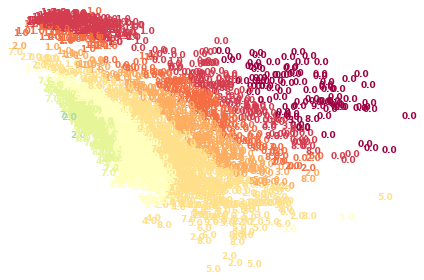

In [0]:
x_min, x_max = np.min(X_te, axis=0), np.max(X_te, axis=0)
X_te = (X_te - x_min) / (x_max - x_min)

plt.figure(figsize=(6, 4))
for i in range(X_te.shape[0]):
  plt.text(X_te[i, 0], X_te[i, 1], str(y_te[i]), color=plt.cm.Spectral(round(ypred[i]) / 10.), fontdict={'weight': 'bold', 'size': 9})
  
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.tight_layout()

plt.show()